# Omdena Liverpool Chapter:
##Detecting Pediatric Acute Lymphoblastic Leukemia using Computer Vision

### The Background
nin ALL there is an accumulation in the bone marrow of immature lymphocyte precursor cells, called blast cells. Eventually the production of normal blood cells is affected by this, resulting in a reduction in the numbers of red cells, normal white cells and platelets in the blood.

ALL is the only form of leukaemia that is more common in children than adults. It is the single most common form of paediatric cancer, accounting for about one-third of all cases in children. About 85% of cases of childhood leukaemia are ALL and it occurs in about 400 children in the UK each year. ALL occurs mostly between the ages of about two and four years. Males are affected more often than females at all ages.

For a detailed overview of Acute Lymphoblastic Leukemia

### The Issue
The task of identifying immature leukemic blasts from normal cells under the microscope is challenging due to morphological similarity, this can make the diagnosis time consuming and costly.

### The Goal

The goal of the project is to build a model which will make early identification of paediatric ALL quick and cost effective – this will allow early treatment to be sought and potentially save the lives of those who are afflicted

### The Learning Outcomes / Process
* Data collecting / organisation
* Data cleaning / augmentation / engineering
* Exploratory Analysis
* Building a Computer Vision model
* Develop and deploy an app.

### Team Leads
* Team 1: Feature Extraction & Traditional ML Classification - Owais Tahir
* Team 2: Deep Learning CNN, ViT etc. - Pranjal Bhatt

### Import Libraries & set up env.

In [ ]:
# installing tensorflow 2.9.1 as what is on local machine during dev.
!pip install tensorflow==2.9.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 69.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 42.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 79.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.3.3
    Uninstalling flatbuffers-23.3.3:
      Successfully uninstalled flatbuffers-23.3.3
  Attempting unin

In [ ]:
!pip install pydot
!pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# system libraries for file manipulation
import os
import time
import shutil
import pathlib
import itertools

# libraries for data computation
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# libraries for creating model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model

In [ ]:
# mount google drive to retrieve the files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# unzip image data
!unzip "/content/drive/MyDrive/Omdena Liverpool Project Files/DATA/liverpool_chapter_image_data.zip"

Streaming output truncated to the last 5000 lines.
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_12_5_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_12_6_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_12_7_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_13_1_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_13_2_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_13_3_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_1_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_2_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_3_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_4_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_5_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/all/UID_25_14_6_all.bmp  
  inflating: C-NMC_Leukemia/training_data/fold_2/

### Creating functions

* Function to create data frames for labels, train, validation & test set
* Function to create tensors from the images
* Function to display images
* Callback function for model optimization
* Plots:  labels, training & confusion matrix

#### df function

In [ ]:
# Generate data paths with labels
def define_paths(dir):
    filepaths = []
    labels = []

    folds = os.listdir(dir)
    for fold in folds:
        foldpath = os.path.join(dir, fold)
        filelist = os.listdir(foldpath)

        for fold_ in filelist:
            foldpath_ = os.path.join(foldpath, fold_)
            filelist_ = os.listdir(foldpath_)

            for file_ in filelist_:
                fpath = os.path.join(foldpath_, file_)
                filepaths.append(fpath)
                labels.append(fold_)

    return filepaths, labels


# Concatenate data paths with labels into one dataframe ( to later be fitted into the model )
def define_df(files, classes):
    Fseries = pd.Series(files, name= 'filepaths')
    Lseries = pd.Series(classes, name='labels')
    return pd.concat([Fseries, Lseries], axis= 1)


# Function that create dataframe for train, validation, and test data
def create_df(data_dir):

    # train dataframe
    files, classes = define_paths(data_dir)
    df = define_df(files, classes)

    strat = df['labels']
    train_df, dummy_df = train_test_split(df, train_size=0.7, shuffle=True, random_state=123, stratify=strat)

    # test dataframe
    strat = dummy_df['labels']
    valid_df, test_df= train_test_split(dummy_df, train_size=0.5, shuffle=True, random_state=123, stratify=strat)

    return train_df, valid_df, test_df

#### Create model data

Note:  test_data is produced from the validation set.

In [ ]:
def create_model_data (train_df, valid_df, test_df, batch_size):

    ''' Because the model uses data from the image data generator,
    this function takes the train, validation, and test dataframes
    and fits them into the picture data generator.
    Image data generator converts images into tensors. '''

    # define model parameters
    img_size = (224, 224)
    channels = 3
    color = 'rgb'
    img_shape = (img_size[0], img_size[1], channels)

    ts_length = len(test_df)
    test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
    test_steps = ts_length // test_batch_size

    # This function simply takes the image and returns it again. It will be used in image data generators for data augmentation.
    def scalar(img):
        return img

    tr_gen = ImageDataGenerator(preprocessing_function = scalar, horizontal_flip= True)
    ts_gen = ImageDataGenerator(preprocessing_function = scalar)

    train_gen = tr_gen.flow_from_dataframe(train_df, x_col = 'filepaths',
                                           y_col = 'labels', target_size = img_size,
                                           class_mode = 'categorical',
                                        color_mode = color, shuffle = True,
                                        batch_size = batch_size)

    valid_gen = ts_gen.flow_from_dataframe(valid_df, x_col = 'filepaths',
                                           y_col = 'labels', target_size = img_size,
                                           class_mode = 'categorical',
                                        color_mode = color, shuffle = True,
                                        batch_size = batch_size)

    # custom test_batch size
    test_gen = ts_gen.flow_from_dataframe(test_df, x_col = 'filepaths',
                                          y_col = 'labels', target_size = img_size,
                                          class_mode = 'categorical',
                                        color_mode = color, shuffle = False,
                                        batch_size = test_batch_size)

    return train_gen, valid_gen, test_gen

#### Show images within the dataset

In [ ]:
def show_images(gen):

    g_dict = gen.class_indices
    classes = list(g_dict.keys())
    images, labels = next(gen)

    length = len(labels)
    sample = min(length, 25)

    plt.figure(figsize= (20, 20))

    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i] / 255
        plt.imshow(image)
        index = np.argmax(labels[i])  # image index
        class_name = classes[index]   # class of image
        plt.title(class_name, color= 'green', fontsize= 12)
        plt.axis('off')
    plt.show()

#### Plot the label counts

In [ ]:
def plot_label_count(df, plot_title):

    vcounts = df['labels'].value_counts()
    labels = vcounts.keys().tolist()
    values = vcounts.tolist()
    lcount = len(labels)

    if lcount > 55:
        print('Error:  55 samples minimum required')

    else:
        plot_labels(lcount, labels, values, plot_title)

def plot_labels(lcount, labels, values, plot_title):
    width = lcount * 4
    width = np.min([width, 20])

    plt.figure(figsize= (width, 5))

    form = {'family': 'serif', 'color': 'blue', 'size': 25}
    sns.barplot(labels, values)
    plt.title(f'Images per Label in {plot_title} data', fontsize= 24, color= 'blue')
    plt.xticks(rotation= 90, fontsize= 18)
    plt.yticks(fontsize= 18)
    plt.xlabel('CLASS', fontdict= form)
    yaxis_label = 'IMAGE COUNT'
    plt.ylabel(yaxis_label, fontdict= form)

    rotation = 'vertical' if lcount >= 8 else 'horizontal'
    for i in range(lcount):
        plt.text(i, values[i] / 2, str(values[i]), fontsize= 12,
                rotation= rotation, color= 'yellow', ha= 'center')

    plt.show()

#### Create callback class

In the context of machine learning, a callback is a mechanism that allows you to customize and control the behavior of the training process during the training of a model. It is a function or a set of functions that are called at specific points during the training process, typically after each epoch (a complete pass through the training data).

Callbacks provide a way to monitor and influence the training process without explicitly modifying the training loop. They can perform various tasks, such as saving the best model weights, logging metrics, early stopping, learning rate scheduling, visualizing model performance, and more. Callbacks are particularly useful for implementing techniques like model checkpointing, reducing overfitting, and fine-tuning hyperparameters.


In [ ]:
class MyCallback(keras.callbacks.Callback):
    def __init__(self, model, patience, stop_patience, threshold, factor, batches, epochs, ask_epoch):
        super(MyCallback, self).__init__()
        self.model = model
        self.patience = patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience = stop_patience # specifies how many times to adjust lr without improvement to stop training
        self.threshold = threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor = factor # factor by which to reduce the learning rate
        self.batches = batches # number of training batch to run per epoch
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.ask_epoch_initial = ask_epoch # save this value to restore if restarting training

        # callback variables
        self.count = 0 # how many times lr has been reduced without improvement
        self.stop_count = 0
        self.best_epoch = 1   # epoch with the lowest loss
        self.initial_lr = float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initial learning rate and save it
        self.highest_tracc = 0.0 # set highest training accuracy to 0 initially
        self.lowest_vloss = np.inf # set lowest validation loss to infinity initially
        self.best_weights = self.model.get_weights() # set best weights to model's initial weights
        self.initial_weights = self.model.get_weights()   # save initial weights if they have to get restored

    # Define a function that will run when train begins
    def on_train_begin(self, logs= None):
        msg = 'Do you want the model to prompt you to halt the training [y/n]?' # 'y' if you want to be prompted
        print(msg)
        ans = input('')
        if ans in ['Y', 'y']:
            self.ask_permission = 1
        elif ans in ['N', 'n']:
            self.ask_permission = 0

        msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
        print(msg)
        self.start_time = time.time()


    def on_train_end(self, logs= None):
        stop_time = time.time()
        tr_duration = stop_time - self.start_time
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))

        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print(msg)

        # this sets the weights to the best weights
        self.model.set_weights(self.best_weights)


    def on_train_batch_end(self, batch, logs= None):

        acc = logs.get('accuracy') * 100
        loss = logs.get('loss')

        # prints over on the same line to show running batch count
        msg = '{0:20s}processing batch {1:} of {2:5s}-   accuracy=  {3:5.3f}   -   loss: {4:8.5f}'.format(' ', str(batch), str(self.batches), acc, loss)
        print(msg, '\r', end= '')


    def on_epoch_begin(self, epoch, logs= None):
        self.ep_start = time.time()


    # at the end of each epoch,  this function initialises
    def on_epoch_end(self, epoch, logs= None):
        ep_end = time.time()
        duration = ep_end - self.ep_start

        lr = float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
        current_lr = lr
        acc = logs.get('accuracy')  # get training accuracy
        v_acc = logs.get('val_accuracy')  # get validation accuracy
        loss = logs.get('loss')  # get training loss for this epoch
        v_loss = logs.get('val_loss')  # get the validation loss for this epoch

        # if training accuracy is below threshold adjust lr based on training accuracy
        if acc < self.threshold:
            monitor = 'accuracy'
            if epoch == 0:
                pimprov = 0.0
            else:
                pimprov = (acc - self.highest_tracc ) * 100 / self.highest_tracc # define improvement of model progres

            if acc > self.highest_tracc: # training accuracy improved in the epoch
                self.highest_tracc = acc # set new highest training accuracy
                self.best_weights = self.model.get_weights() # training accuracy improved so save the weights
                self.count = 0 # set count to 0 since training accuracy improved
                self.stop_count = 0 # set stop counter to 0
                if v_loss < self.lowest_vloss:
                    self.lowest_vloss = v_loss
                self.best_epoch = epoch + 1  # set the value of best epoch for this epoch

            else:
                # training accuracy did not improve check
                # if so adjust learning rate
                if self.count >= self.patience - 1: # lr should be adjusted
                    lr = lr * self.factor # adjust the learning by factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    self.count = 0 # reset the count to 0
                    self.stop_count = self.stop_count + 1 # count the number of consecutive lr adjustments
                    self.count = 0 # reset counter
                    if v_loss < self.lowest_vloss:
                        self.lowest_vloss = v_loss
                else:
                    self.count = self.count + 1 # increment patience counter

        else: # training accuracy is above threshold so adjust learning rate based on validation loss
            monitor = 'val_loss'
            if epoch == 0:
                pimprov = 0.0

            else:
                pimprov = (self.lowest_vloss - v_loss ) * 100 / self.lowest_vloss

            if v_loss < self.lowest_vloss: # check if the validation loss improved
                self.lowest_vloss = v_loss # replace lowest validation loss with new validation loss
                self.best_weights = self.model.get_weights() # validation loss improved so save the weights
                self.count = 0 # reset count since validation loss improved
                self.stop_count = 0
                self.best_epoch = epoch + 1 # set the value of the best epoch to this epoch

            else: # validation loss did not improve
                if self.count >= self.patience - 1: # need to adjust lr
                    lr = lr * self.factor # adjust the learning rate
                    self.stop_count = self.stop_count + 1 # increment stop counter because lr was adjusted
                    self.count = 0 # reset counter
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer

                else:
                    self.count = self.count + 1 # increment the patience counter

                if acc > self.highest_tracc:
                    self.highest_tracc = acc

        msg = f'{str(epoch + 1):^3s}/{str(self.epochs):4s} {loss:^9.3f}{acc * 100:^9.3f}{v_loss:^9.5f}{v_acc * 100:^9.3f}{current_lr:^9.5f}{lr:^9.5f}{monitor:^11s}{pimprov:^10.2f}{duration:^8.2f}'
        print(msg)

        if self.stop_count > self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
            msg = f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print(msg)
            self.model.stop_training = True # stop training

        else:
            if self.ask_epoch != None and self.ask_permission != 0:
                if epoch + 1 >= self.ask_epoch:
                    msg = 'enter H to halt training or an integer for number of epochs to run then ask again'
                    print(msg)

                    ans = input('')
                    if ans == 'H' or ans == 'h':
                        msg = f'training has been halted at epoch {epoch + 1} due to user input'
                        print(msg)
                        self.model.stop_training = True # stop training

                    else:
                        try:
                            ans = int(ans)
                            self.ask_epoch += ans
                            msg = f' training will continue until epoch {str(self.ask_epoch)}'
                            print(msg)
                            msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor', '% Improv', 'Duration')
                            print(msg)

                        except Exception:
                            print('Invalid')

#### Plot training history

In [ ]:
def plot_training(hist):

    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i+1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('ggplot')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'b', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s = 100, c = 'red', label = loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'b', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s = 100, c = 'red', label = acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()


#### Create confusion matrix

In [ ]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Reds):

	plt.figure(figsize = (10, 10))
	plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
	plt.title(title)
	plt.colorbar()

	tick_marks = np.arange(len(classes))
	plt.xticks(tick_marks, classes, rotation= 45)
	plt.yticks(tick_marks, classes)

	# to stay consistent with Damirs results
	if normalize:
		cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
		print('Normalized Confusion Matrix')

	else:
		print('Confusion Matrix, Without Normalization')

	print(cm)

	thresh = cm.max() / 2.
	for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
		plt.text(j, i, cm[i, j], horizontalalignment = 'center',
		         color = 'white' if cm[i, j] > thresh else 'black')

	plt.tight_layout()
	plt.ylabel('True Label')
	plt.xlabel('Predicted Label')

# Building the model

We are using EfficientNet. Which is a family of convolutional neural network architectures designed to achieve state-of-the-art performance in terms of accuracy and efficiency in image recognition tasks.

EfficientNet models are based on a scaling technique that balances model depth, width, and resolution to optimize performance. The "B3" in EfficientNet-B3 represents a specific variant within the EfficientNet family. Each variant, denoted by a different letter and number, has different scaling coefficients that determine the model's size and capacity.

EfficientNet-B3 is larger and more powerful compared to its smaller counterparts (such as EfficientNet-B0 or EfficientNet-B1) but smaller than larger variants (such as EfficientNet-B4 or EfficientNet-B7). It strikes a balance between model size and accuracy, making it suitable for various image classification tasks.

### Load in data

In [ ]:
data_dir = '/content/C-NMC_Leukemia/training_data'

try:
    # Get splitted data
    train_df, valid_df, test_df = create_df(data_dir)

    # Get Generators
    batch_size = 40
    train_gen, valid_gen, test_gen = create_model_data(train_df, valid_df, test_df, batch_size)

except:
    print('Invalid input')

Found 7462 validated image filenames belonging to 2 classes.
Found 1599 validated image filenames belonging to 2 classes.
Found 1600 validated image filenames belonging to 2 classes.


### Let's take a look at some sample data:

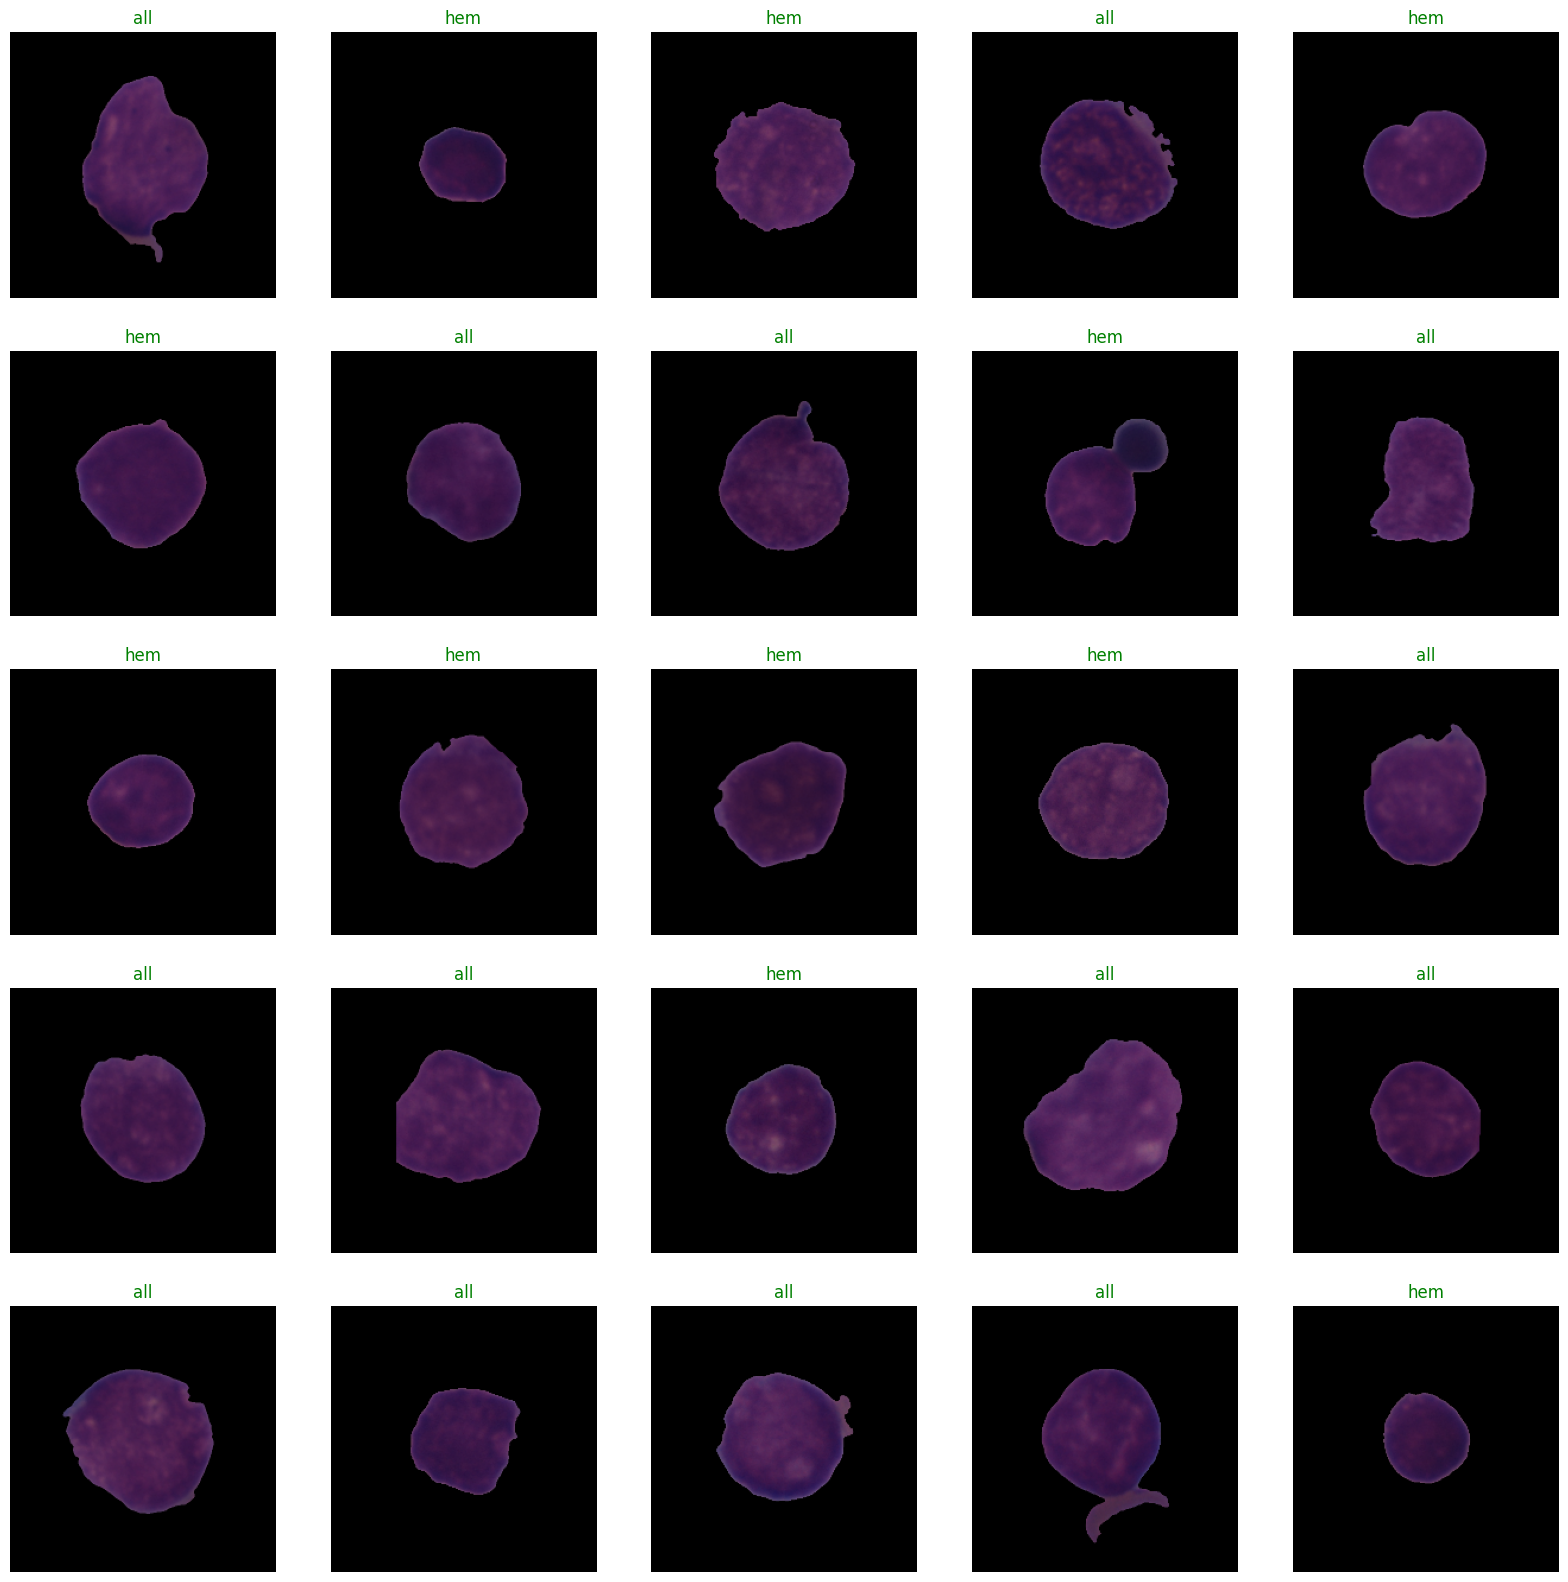

In [ ]:
show_images(train_gen)

### Model architecture

In [ ]:
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer


base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top = False,
                                                               weights = "imagenet",
                                                               input_shape = img_shape,
                                                               pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001),
    Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),
          activity_regularizer = regularizers.l1(0.006),
                bias_regularizer = regularizers.l1(0.006),
           activation= 'relu'),
    Dropout(rate = 0.45, seed = 123),
    Dense(class_count, activation = 'softmax')
])

model.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

43941136/43941136 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional)  (None, 1536)             10783535  
                                                                 
 batch_normalization (BatchN  (None, 1536)             6144      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               393472    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 11,183,665
Trainable params: 11,093,290
Non

### Plot the model architecture

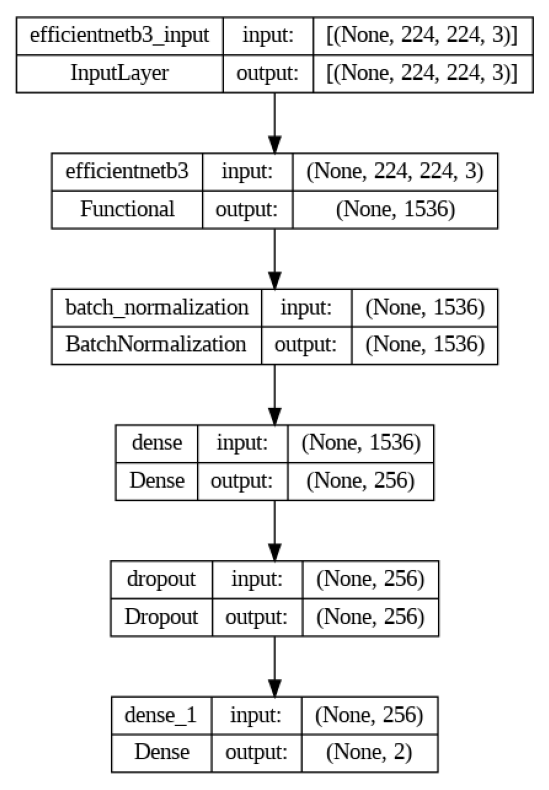

In [ ]:
plot_model(model, show_shapes=True,
           show_layer_names=True,
           to_file='model_architecture.png')

# Display the plot
image = plt.imread('model_architecture.png')
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

### Set ther callback baseline parameters

In [ ]:
batch_size = 40
epochs = 40
patience = 1   #number of epochs to wait to adjust lr if monitored value does not improve
stop_patience = 3   # number of epochs to wait before stopping training if monitored value does not improve
threshold = 0.9   # if train accuracy is < threshold adjust monitor accuracy, else monitor validation loss
factor = 0.5   # factor to reduce lr by
ask_epoch = 5   # number of epochs to run before asking if you want to halt training
batches = int(np.ceil(len(train_gen.labels) / batch_size))    # number of training batch to run per epoch

callbacks = [MyCallback(model = model, patience = patience,
                        stop_patience = stop_patience,
                        threshold = threshold, factor= factor,
                        batches = batches, epochs = epochs,
                        ask_epoch= ask_epoch )]

### Train the model

In [ ]:
history = model.fit(x = train_gen, epochs = epochs, verbose = 0,
                    callbacks = callbacks, validation_data = valid_gen,
                    validation_steps = None, shuffle = False)

Do you want model asks you to halt the training [y/n] ?
 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration


 1 /40     5.228   82.927   3.73087  76.423   0.00100  0.00100  accuracy     0.00    161.99 
 2 /40     2.646   88.756   2.16672  82.427   0.00100  0.00100  accuracy     7.03    145.71 
 3 /40     1.586   90.566   1.24850  89.368   0.00100  0.00100  val_loss    42.38    144.88 
 4 /40     0.988   91.825   0.93329  86.366   0.00100  0.00100  val_loss    25.25    144.14 
 5 /40     0.650   92.763   0.66703  86.116   0.00100  0.00100  val_loss    28.53    144.42 
 6 /40     0.450   94.130   0.53223  85.679   0.00100  0.00100  val_loss    20.21    144.48 
 7 /40     0.343   94.519   0.31259  94.434   0.00100  0.00100  val_loss    41.27    144.07 
 8 /40     0.278   95.176   0.32351  91.432   0.00100  0.00050  val_loss    -3.49    144.18 
 9 /40     0.213   96.811   0.24121  94.622   0.00050  0.00050  val_loss    22.84    144.62 
10 /40     0.188   97.400   0.22865  95.310   0.00050  0.00050  val_loss     5.20    150.41 
11 /40     0.164   97.936   0.26152  93.246   0.00050  0.00025  val_lo

### Plotting the models performance

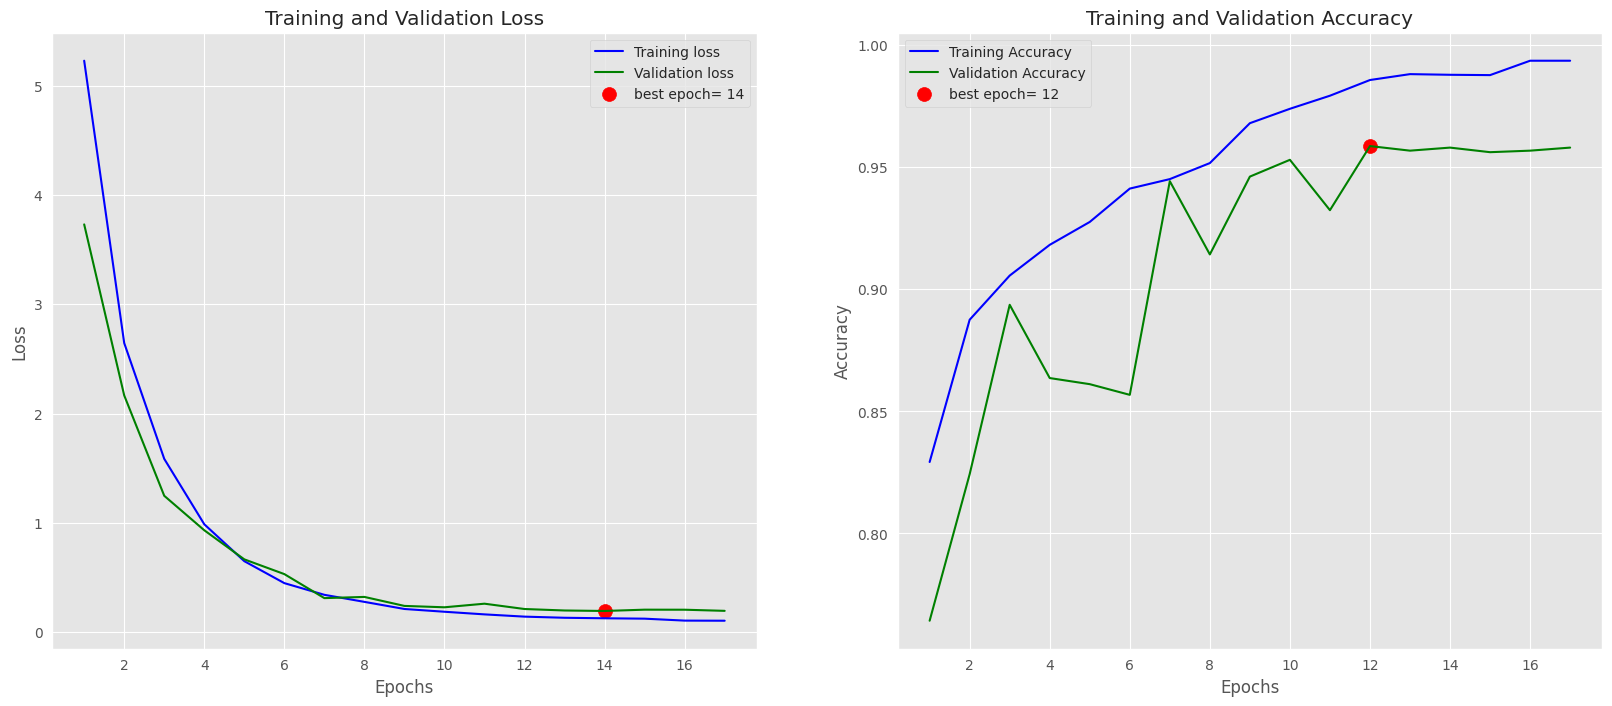

In [ ]:
plot_training(history)

### Model Evaluatrion

In [ ]:
ts_length = len(test_df)
test_batch_size = test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps = test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps = test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps = test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

20/20 [==============================] - 11s 456ms/step - loss: 0.1968 - accuracy: 0.9606
Train Loss:  0.09271427243947983
Train Accuracy:  1.0
--------------------
Validation Loss:  0.1953427493572235
Validation Accuracy:  0.956250011920929
--------------------
Test Loss:  0.19681274890899658
Test Accuracy:  0.9606249928474426


### Produce the predictions

In [ ]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)
print(y_pred)

<ipython-input-25-4f04c24daf97>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test_gen)


[0 0 0 ... 0 1 0]


### Build the Confusion Matric and Classification Report

Confusion Matrix, Without Normalization
[[1066   25]
 [  38  471]]
              precision    recall  f1-score   support

         all       0.97      0.98      0.97      1091
         hem       0.95      0.93      0.94       509

    accuracy                           0.96      1600
   macro avg       0.96      0.95      0.95      1600
weighted avg       0.96      0.96      0.96      1600



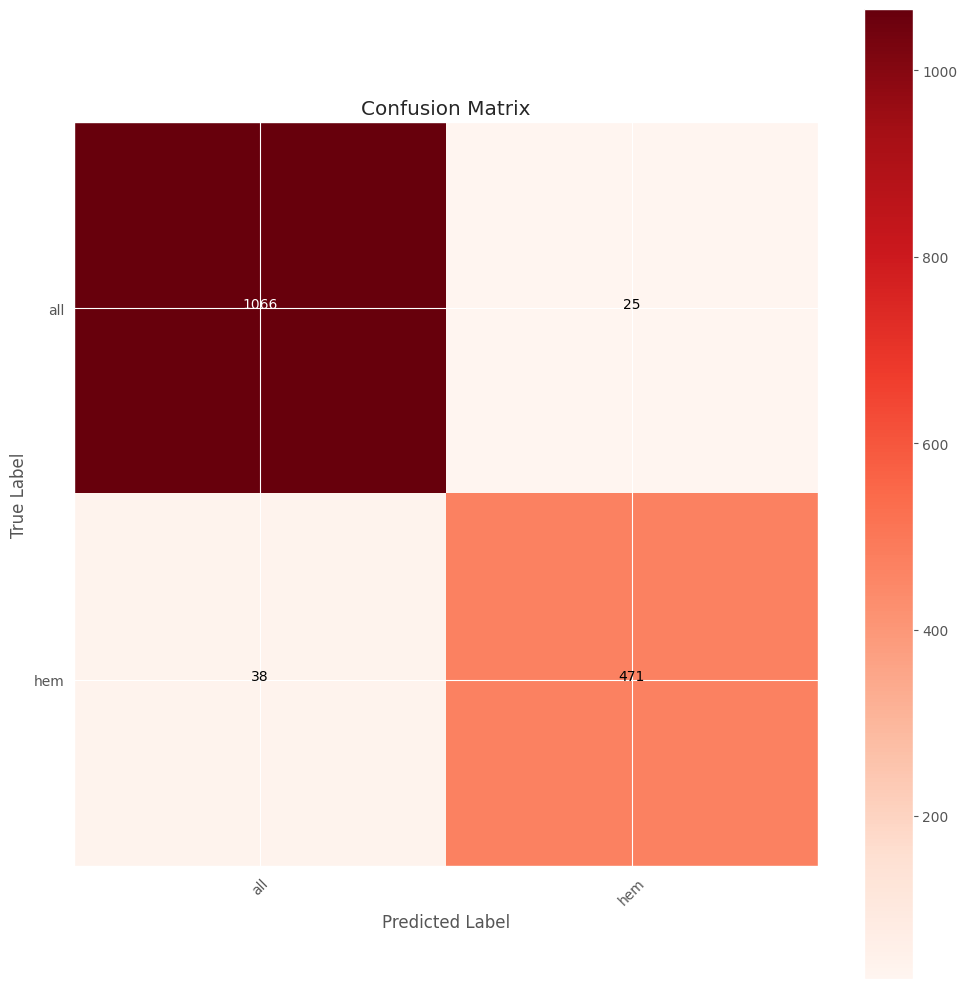

In [ ]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm = cm, classes = classes, title = 'Confusion Matrix')

# Classification report
print(classification_report(test_gen.classes, y_pred, target_names = classes))

### Save model version

In [ ]:
model_name = model.input_names[0][:-6]
subject = input('Enter Name for Model ie. Version 1')
acc = test_score[1] * 100
save_path = ''

# Save model
# this saves the model with it's performance in the title
save_id = str(f'{model_name}-{subject}-{"%.2f" %round(acc, 2)}.h5')
model_save_loc = os.path.join(save_path, save_id)
model.save(model_save_loc)
print(f'Model saved as {model_save_loc}')

# Save weights
weight_save_id = str(f'{model_name}-{subject}-weights.h5')
weights_save_loc = os.path.join(save_path, weight_save_id)
model.save_weights(weights_save_loc)
print(f'Weights saved as {weights_save_loc}')

Enter Name for Model ie. Version 1test
Model saved as efficientnetb3-test-96.06.h5
Weights saved as efficientnetb3-test-weights.h5
